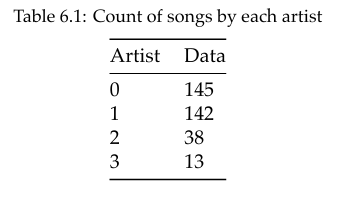

In [1]:
# Python dict
series = {
    'index': [0, 1, 2, 3],
    'data': [145, 142, 38, 13],
    'name': 'songs',
}

In [2]:
def get(series, idx):
    value_idx = series['index'].index(idx)
    return series['data'][value_idx]

In [3]:
get(series, 1)

142

In [4]:
songs = {
    'index': ['Paul', 'John', 'George', 'Ringo'],
    'data': [145, 142, 38, 13],
    'name': 'counts'
}

In [6]:
get(songs, 'John')

142

#### Pandas series

In [7]:
import pandas as pd
songs2 = pd.Series([145, 142, 38, 13],
                   name='counts')

In [8]:
songs2

0    145
1    142
2     38
3     13
Name: counts, dtype: int64

In [9]:
songs3 = pd.Series([145, 142, 38, 13],
                   name='counts', dtype='int64[pyarrow]')

In [10]:
songs3

0    145
1    142
2     38
3     13
Name: counts, dtype: int64[pyarrow]

In [11]:
songs2.index

RangeIndex(start=0, stop=4, step=1)

In [12]:
songs3.index

RangeIndex(start=0, stop=4, step=1)

In [13]:
class Foo:
    pass

ringo = pd.Series(
    ['Richard', 'Starkey', 13, Foo()],
    name='ringo')

In [14]:
ringo

0                                        Richard
1                                        Starkey
2                                             13
3    <__main__.Foo object at 0x000001FFEF0B7620>
Name: ringo, dtype: object

In [15]:
import numpy as np

In [16]:
nan_series = pd.Series([2, np.nan],
                       index=['Ono', 'Clapton'])

In [17]:
nan_series

Ono        2.0
Clapton    NaN
dtype: float64

In [18]:
nan_series2 = pd.Series([2, np.nan],
                       index=['Ono', 'Clapton'], dtype='int64[pyarrow]')

In [19]:
nan_series2

Ono           2
Clapton    <NA>
dtype: int64[pyarrow]

In [23]:
# Ignores NA values
nan_series2.count()

np.int64(1)

In [22]:
nan_series2.size

2

In [24]:
numpy_ser = np.array([145, 142, 38, 13])

In [25]:
songs3.iloc[1]

142

In [26]:
numpy_ser[1]

np.int64(142)

In [27]:
songs3.mean()

84.5

In [28]:
numpy_ser.mean()

np.float64(84.5)

In [29]:
mask = songs3 > songs3.median()

In [30]:
mask

0     True
1     True
2    False
3    False
Name: counts, dtype: bool[pyarrow]

In [31]:
songs3[mask]

0    145
1    142
Name: counts, dtype: int64[pyarrow]

In [32]:
numpy_ser[numpy_ser > np.median(numpy_ser)]

array([145, 142])

In [33]:
s = pd.Series(['s', 'm', 'l'], dtype='category')

In [34]:
s.cat.categories

Index(['l', 'm', 's'], dtype='object')

In [36]:
s.cat.ordered

False

In [35]:
(s
 .cat.add_categories(['xs', 'xl', ])
 .cat.reorder_categories(['xs', 's', 'm', 'l', 'xl'],
                         ordered=True)
)

0    s
1    m
2    l
dtype: category
Categories (5, object): ['xs' < 's' < 'm' < 'l' < 'xl']

### Series Deep Dive

In [38]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/' \
        'vehicles.csv.zip'
df = pd.read_csv(url, dtype_backend='pyarrow',
                 engine='pyarrow')
city_mpg = df.city08
highway_mpg = df.highway08

In [39]:
city_mpg

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64[pyarrow]

In [40]:
highway_mpg

0        25
1        14
2        33
3        12
4        23
         ..
41139    26
41140    28
41141    24
41142    24
41143    21
Name: highway08, Length: 41144, dtype: int64[pyarrow]

In [41]:
len(dir(city_mpg))

422